# Lotka-Volterra Results

In [3]:
import numpy as np
# plot stability vs # of models returned

epsilon = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1, 0.11,0.12,0.13,0.14]
k = [1,2,3,4,5,6]

tau = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45, 0.5,0.55, 0.6,0.63,0.65, 0.7,0.75,0.8,0.85,0.9,0.95,0.99]

def stability_and_set_size(params, filepath):

    # store stability and set size for each parameter value
    stability = []
    set_size = []
    accuracy = []
    discounted_set_acc = []
    p_singleton = []

    for p in params:
        # load the results 
        res = np.load(filepath.format(p))
        stability.append(np.max(1-res[:,0])) # stability
        set_size.append(np.median(res[:,1])) # set size
        p_singleton.append(np.mean(res[:,1] == 1))
        accuracy.append(np.mean(res[:,3]))
        if p == 0.09 or p == 2 or p == 0.63:
            print(p, np.mean(res[:,3]*1/res[:,1]))
        discounted_set_acc.append(np.mean(res[:,3]*1/res[:,1]))
    return stability, set_size, accuracy, discounted_set_acc, p_singleton

eps_filepath = "results/lotka_volterra/ensemble_sindy_selection_method_inflated_argmax_epsilon{}_kNone_tolNoneB7000.npy"
eps_stability, eps_set_size, eps_accuracy, eps_disc, eps_sing = stability_and_set_size(epsilon, eps_filepath)

k_filepath = "results/lotka_volterra/ensemble_sindy_selection_method_top_k_epsilonNone_k{}_tolNoneB7000.npy"
k_stability, k_set_size, k_accuracy, k_disc, k_sing = stability_and_set_size(k, k_filepath)

tau_filepath = "results/lotka_volterra/ensemble_sindy_selection_method_avg_thresh_epsilonNone_kNone_tol{}B7000.npy"
tau_stability, tau_set_size, tau_accuracy, tau_disc, tau_sing  = stability_and_set_size(tau, tau_filepath)

bootstrap_filepath = "results/lotka_volterra/ensemble_sindy_selection_method_top_k_epsilonNone_k1_tolNoneB7000.npy"
bootstrap = np.load(bootstrap_filepath)
bootstrap_stability = (1- bootstrap[:,0]).max()
bootstrap_set_size = np.median(bootstrap[:,1])
bootstrap_disc = (bootstrap[:,3]*1/bootstrap[:,1]).mean()

base_filepath = "results/lotka_volterra/sindy_selection_method_argmax_epsilonNone_kNone_tolNoneBNone.npy"
base = np.load(base_filepath)
base_stability = (1- base[:,0]).max()
base_set_size = np.median(base[:,1])
base_disc = (base[:,3]*1/base[:,1]).mean()

0.09 0.3007285480978152
2 0.3
0.63 0.31


Text(0, 0.5, 'Median Number of Models Returned\nMedian$\\left(\\{\\hat M_j\\}_{j \\in [N]}\\right)$')

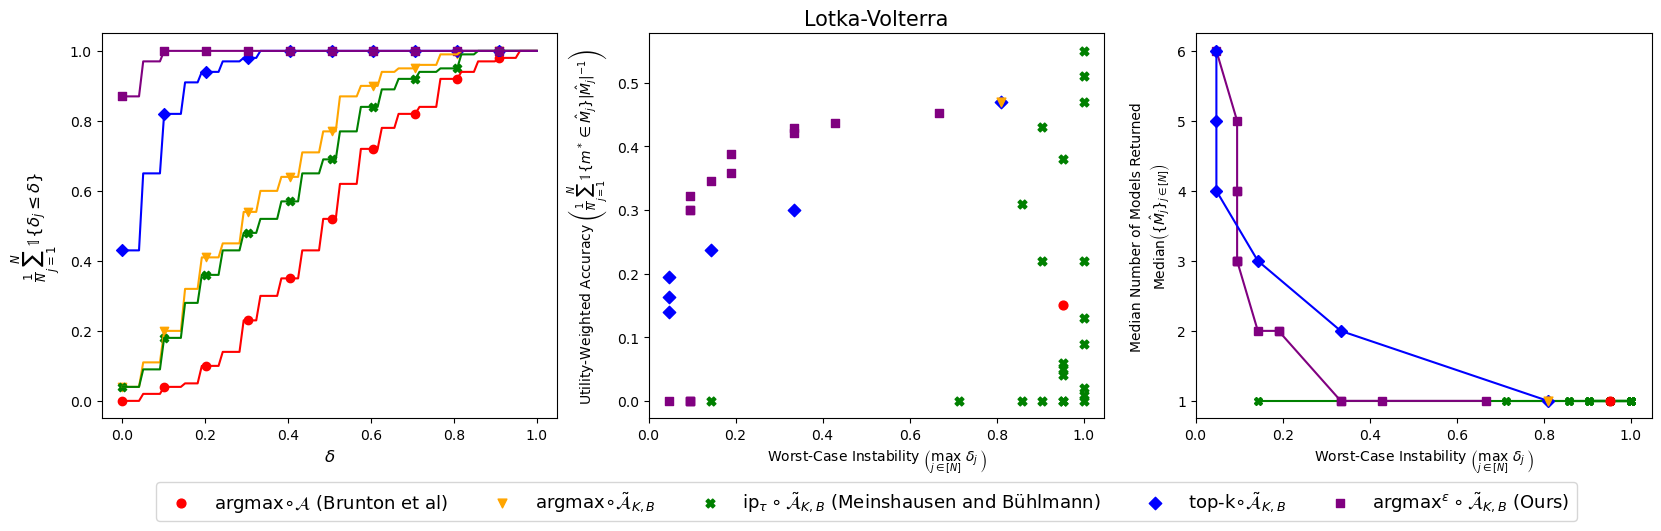

In [4]:
result_path = "results/lotka_volterra"
tol = 0.63
filenames = [result_path + "/sindy_selection_method_argmax_epsilonNone_kNone_tolNoneBNone.npy",
             result_path + "/ensemble_sindy_selection_method_top_k_epsilonNone_k1_tolNoneB7000.npy",
             result_path + f"/ensemble_sindy_selection_method_avg_thresh_epsilonNone_kNone_tol{tol}B7000.npy",
             result_path + "/ensemble_sindy_selection_method_top_k_epsilonNone_k2_tolNoneB7000.npy",
             result_path + "/ensemble_sindy_selection_method_inflated_argmax_epsilon0.09_kNone_tolNoneB7000.npy",
             ]
import numpy as np
import matplotlib.pyplot as plt
colors = ["red", "orange","green", "blue", "purple" ]
labels = ["argmax$\circ  \mathcal{A}$ (Brunton et al)", 
          "argmax$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "ip$_{0.63}\circ  \\tilde{\mathcal{A}}_{K,B}$ (Meinshausen and Bühlmann)",
          "top-2$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "argmax$^{0.09} \circ  \\tilde{\mathcal{A}}_{K,B}$ (Ours)" 
          ]
labels_general = ["argmax$\circ  \mathcal{A}$ (Brunton et al)", 
          "argmax$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "ip$_\\tau\circ  \\tilde{\mathcal{A}}_{K,B}$ (Meinshausen and Bühlmann)",
          "top-k$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "argmax$^\epsilon \circ  \\tilde{\mathcal{A}}_{K,B}$ (Ours)" 
          ]
markers = ["o", "v", "X", "D","s" ]

def percent_by_delta(res, deltas):
    stability_res = 1-res
    ge_delta = [np.mean(stability_res <= deltas[d]) for d in range(len(deltas))]
    return ge_delta

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)

deltas = np.linspace(0,1,100)
for i in range(len(filenames)):
    f   = np.load(filenames[i])
    lst = percent_by_delta(f[:,0], deltas)
    ax1.plot(deltas, lst, c = colors[i])
    if i in [2,3,4]:
        ax1.scatter(deltas[::10], lst[::10], c = colors[i], marker=markers[i], label = labels[i])
    else:
        ax1.scatter(deltas[::10], lst[::10], c = colors[i], marker=markers[i])
ax1.set_xlabel("$\delta$", size = 12)
ax1.set_ylabel("$\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{\delta_j \leq \delta \} $", size = 12)



zorder = [10,10,4,5,4]
discount = [base_disc, bootstrap_disc, tau_disc, k_disc, eps_disc]
stabilities = [[base_stability], [bootstrap_stability], tau_stability, k_stability, eps_stability]

for i in range(len(markers)):
    if i == 1 or i==0:
        ax2.scatter(stabilities[i], discount[i], marker = markers[i], label = labels_general[i], c = colors[i],s =40, zorder=zorder[i])
    else:
        ax2.scatter(stabilities[i], discount[i], marker = markers[i], label = labels_general[i], c = colors[i], zorder = zorder[i],s =40)
ax2.set_xlabel("Worst-Case Instability $\left(\max_{j\in[N]} \ \delta_j\\right)$")
ax2.set_ylabel("Utility-Weighted Accuracy $\left(\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{m^* \in \hat M_j\} |\hat M_j|^{-1}\\right)$")
ax2.legend(loc = "lower left", ncol=len(labels), bbox_to_anchor=(-1.1, -0.29, 0.5, 0.5), prop={'size': 13})
ax2.set_title("Lotka-Volterra", size = 15)

zorder = [10,10,4,5,4]
set_sizes = [[base_set_size], [bootstrap_set_size], tau_set_size, k_set_size, eps_set_size]

for i in range(len(markers)):
    if i == 1 or i==0:
        ax3.scatter(stabilities[i], set_sizes[i], marker = markers[i], label = labels_general[i], c = colors[i],s =40, zorder=zorder[i])
    else:
        ax3.plot(stabilities[i], set_sizes[i], marker = markers[i], label = labels_general[i], c = colors[i], zorder = zorder[i])#,s =40)
ax3.set_xlabel("Worst-Case Instability $\left(\max_{j\in[N]} \  \delta_j\\right)$")
ax3.set_ylabel("Median Number of Models Returned\nMedian$\left(\{\hat M_j\}_{j \in [N]}\\right)$")
#plt.savefig("figures/lv_results_max.png", dpi = 300, bbox_inches= "tight")


# Regression Results

In [5]:
import numpy as np
# plot stability vs # of models returned

epsilon = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1, 0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
k = [1,2,3,4,5,6]
tau = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75,0.8,0.85,0.9,0.95]

def stability_and_set_size(params, filepath):

    # store stability and set size for each parameter value
    stability = []
    set_size = []
    accuracy = []
    discounted_set_acc = []
    p_singleton = []

    for p in params:
        # load the results 
        res = np.load(filepath.format(p))
        stability.append(np.max(1-res[:,0])) # stability
        set_size.append(np.median(res[:,1])) # set size
        p_singleton.append(np.mean(res[:,1] == 1))
        accuracy.append(np.mean(res[:,3]))
        if p == 0.8 or p == 2 or p == 0.3:
            print(p, np.mean(res[:,3]*1/res[:,1]))
        discounted_set_acc.append(np.mean(res[:,3]*1/res[:,1]))
    return stability, set_size, accuracy, discounted_set_acc, p_singleton

eps_filepath = "results/regression_rho0.99/bootstrap_lasso_selection_method_inflated_argmax_epsilon{}_kNone_tolNoneB10000.npy"
eps_stability, eps_set_size, eps_accuracy, eps_disc, eps_sing = stability_and_set_size(epsilon, eps_filepath)

k_filepath = "results/regression_rho0.99/bootstrap_lasso_selection_method_top_k_epsilonNone_k{}_tolNoneB10000.npy"
k_stability, k_set_size, k_accuracy, k_disc, k_sing = stability_and_set_size(k, k_filepath)

tau_filepath = "results/regression_rho0.99/bootstrap_lasso_selection_method_avg_thresh_epsilonNone_kNone_tol{}B10000.npy"
tau_stability, tau_set_size, tau_accuracy, tau_disc, tau_sing  = stability_and_set_size(tau, tau_filepath)

bootstrap_filepath = "results/regression_rho0.99/bootstrap_lasso_selection_method_top_k_epsilonNone_k1_tolNoneB10000.npy"
bootstrap = np.load(bootstrap_filepath)
bootstrap_stability = (1- bootstrap[:,0]).max()
bootstrap_set_size = np.median(bootstrap[:,1])
bootstrap_disc = (bootstrap[:,3]*1/bootstrap[:,1]).mean()

base_filepath = "results/regression_rho0.99/lasso_selection_method_argmax_epsilonNone_kNone_tolNoneBNone.npy"
base = np.load(base_filepath)
base_stability = (1- base[:,0]).max()
base_set_size = np.median(base[:,1])
base_disc = (base[:,3]*1/base[:,1]).mean()

0.3 0.25578068137824234
0.8 0.18722706837814068
2 0.18
0.3 0.18
0.8 0.215


(-0.05, 1.05)

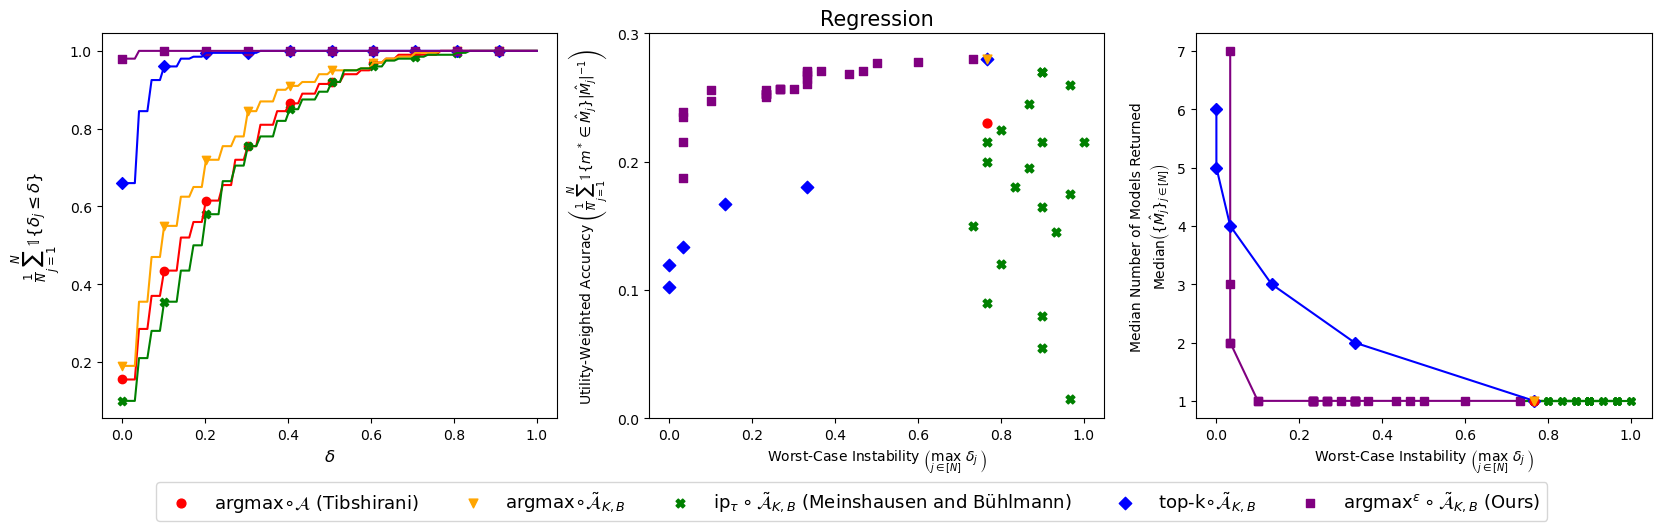

In [6]:
result_path = "results/regression_rho0.99"
tol = 0.3
filenames = [result_path + "/lasso_selection_method_argmax_epsilonNone_kNone_tolNoneBNone.npy",
             result_path + "/bootstrap_lasso_selection_method_top_k_epsilonNone_k1_tolNoneB10000.npy",
             result_path + f"/bootstrap_lasso_selection_method_avg_thresh_epsilonNone_kNone_tol{tol}B10000.npy",
             result_path + "/bootstrap_lasso_selection_method_top_k_epsilonNone_k2_tolNoneB10000.npy",
             result_path + "/bootstrap_lasso_selection_method_inflated_argmax_epsilon0.8_kNone_tolNoneB10000.npy",
             ]
import numpy as np
import matplotlib.pyplot as plt
colors = ["red", "orange","green", "blue", "purple" ]

labels_general = ["argmax$\circ  \mathcal{A}$ (Tibshirani)", 
          "argmax$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "ip$_\\tau\circ  \\tilde{\mathcal{A}}_{K,B}$ (Meinshausen and Bühlmann)",
          "top-k$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "argmax$^\epsilon \circ  \\tilde{\mathcal{A}}_{K,B}$ (Ours)" 
          ]
markers = ["o", "v", "X", "D","s" ]

def percent_by_delta(res, deltas):
    stability_res = 1-res
    ge_delta = [np.mean(stability_res <= deltas[d]) for d in range(len(deltas))]
    return ge_delta

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)

deltas = np.linspace(0,1,100)
for i in range(len(filenames)):
    f   = np.load(filenames[i])
    lst = percent_by_delta(f[:,0], deltas)
    ax1.plot(deltas, lst, c = colors[i])
    if i in [2,3,4]:
        ax1.scatter(deltas[::10], lst[::10], c = colors[i], marker=markers[i])
    else:
        ax1.scatter(deltas[::10], lst[::10], c = colors[i], marker=markers[i])
ax1.set_xlabel("$\delta$", size = 12)
ax1.set_ylabel("$\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{\delta_j \leq \delta \} $", size = 12)


zorder = [10,10,4,5,4]
discount = [base_disc, bootstrap_disc, tau_disc, k_disc, eps_disc]
stabilities = [[base_stability], [bootstrap_stability], tau_stability, k_stability, eps_stability]

for i in range(len(markers)):
    if i == 1 or i==0:
        ax2.scatter(stabilities[i], discount[i], marker = markers[i], label = labels_general[i], c = colors[i],s =40, zorder=zorder[i])
    else:
        ax2.scatter(stabilities[i], discount[i], marker = markers[i], label = labels_general[i], c = colors[i], zorder = zorder[i],s =40)
ax2.set_xlabel("Worst-Case Instability $\left(\max_{j\in[N]} \ \delta_j\\right)$")
ax2.set_ylabel("Utility-Weighted Accuracy $\left(\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{m^* \in \hat M_j\} |\hat M_j|^{-1}\\right)$")
ax2.legend(loc = "lower left", ncol=len(labels_general), bbox_to_anchor=(-1.1, -0.29, 0.5, 0.5), prop={'size': 13})
ax2.set_title("Regression", size = 15)
ax2.set_xlim((-0.05,1.05))
ax2.set_yticks([0.0,0.1,0.2,0.3])

zorder = [10,10,4,5,4]
set_sizes = [[base_set_size], [bootstrap_set_size], tau_set_size, k_set_size, eps_set_size]

for i in range(len(markers)):
    if i == 1 or i==0:
        ax3.scatter(stabilities[i], set_sizes[i], marker = markers[i], label = labels_general[i], c = colors[i],s =40, zorder=zorder[i])
    else:
        ax3.plot(stabilities[i], set_sizes[i], marker = markers[i], label = labels_general[i], c = colors[i], zorder = zorder[i])#,s =40)
ax3.set_xlabel("Worst-Case Instability $\left(\max_{j\in[N]}  \ \delta_j\\right)$")
ax3.set_ylabel("Median Number of Models Returned\nMedian$\left(\{\hat M_j\}_{j \in [N]}\\right)$")
ax3.set_xlim((-0.05,1.05))
#plt.savefig("figures/reg_results_max.png", dpi = 300, bbox_inches= "tight")


## Regression: Visualizing average model weights across trials

/tmp/ipykernel_230154/581333514.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array([np.array([np.array(key)*1,sum_dict[key]])  for key in sum_dict.keys() if sum_dict[key] in top_k])


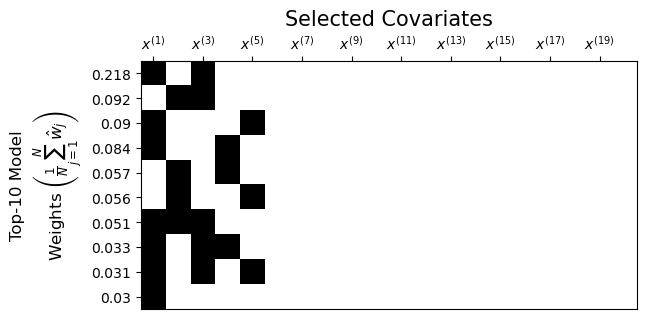

In [12]:
import pickle

sum_dict = {}
N = 200
for d in range(N):
    with open("results/regression_rho0.99/prob_weights10000_dataset{}JNone.pkl".format(d), 'rb') as f:
        subset_dict = pickle.load(f)
    for key in subset_dict.keys():
        if key in sum_dict.keys():
            sum_dict[key] = sum_dict[key] + subset_dict[key]/N
        else:
            sum_dict[key] = subset_dict[key]/N
    
k = 10
top_k = (-np.sort(-np.array(list(sum_dict.values()))))[:k]
weights = np.array([np.array([np.array(key)*1,sum_dict[key]])  for key in sum_dict.keys() if sum_dict[key] in top_k])
sort_idx = np.argsort(-weights[:,1])


plt.imshow(np.stack(weights[sort_idx][:,0],axis=0), cmap  = "Greys")
plt.xticks([0,2,4,6,8,10,12,14,16,18], ["$x^{(1)}$","$x^{(3)}$","$x^{(5)}$","$x^{(7)}$","$x^{(9)}$","$x^{(11)}$","$x^{(13)}$","$x^{(15)}$","$x^{(17)}$","$x^{(19)}$"])
plt.yticks(np.arange(10)[:k], np.round(top_k,3)) 
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.title("Selected Covariates", size = 15)
plt.ylabel(f"Top-{k}"+" Model\nWeights $\left(\\frac{1}{N}\sum_{j=1}^{N}\hat w_j\\right)$", size = 12)
plt.savefig("figures/model_weights_reg.png", dpi = 300, bbox_inches="tight")